<a href="https://colab.research.google.com/github/vegger/MLDM/blob/main/labs/L04_Polynomial_and_Logistic_Regression_LAB_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
RANDOM_SEED = 0x0

# TASK 1: Polynomial Regression (5 Points): 

Let's create and explore the data.

In [44]:
# set the random seed to an RANDOM_SEED, so that everyone has the same data to work with
np.random.seed(seed=RANDOM_SEED)
# create predictor variable, that have standard normal distribution and reshape it in order to use for the model training
x = np.random.normal(0, 1, 100).reshape(-1, 1)
# create target variable
y = 3*x**3 + 2*x**2 + x + np.random.normal(0, 10, 100).reshape(-1, 1)

Visualise the data

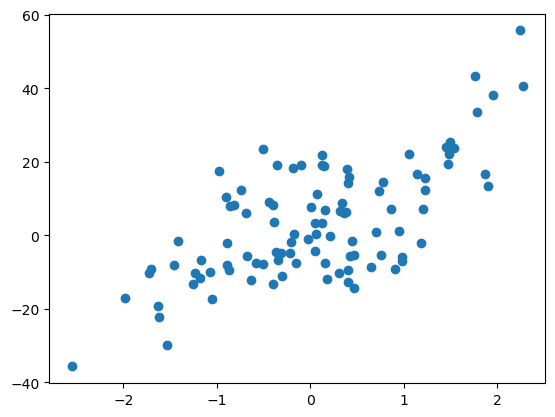

In [45]:
plt.scatter(x, y)
plt.show()

## Task 1a
Apply Linear Regression on the data


1. Split the data in the train and test set (80/20), set `random_state` to `RANDOM_SEED`.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=RANDOM_SEED, train_size=0.8, test_size=0.2)

2. Apply Linear Regression on the data and predict `y` values for training as well test data 

In [47]:
from sklearn.linear_model import LinearRegression 
lrY_train = LinearRegression().fit(X_train, y_train)
lrY_test = LinearRegression().fit(X_test, y_test)

3. Calculate MSE for training as well as for test data.

In [48]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y, lrY_train.predict(y))
mse_test = mean_squared_error(y, lrY_test.predict(y))

print(f"MSE of training data: {mse_train}")
print(f"MSE of test data: {mse_test}")

MSE of training data: 24937.735105541036
MSE of test data: 16423.464146149698


4. Visualize the model's artefacts: Plot all the data as well as Linear Regression predictions for training and test data in a scatter plot. Don't forget a legend to differentiate the data.

In [49]:
def plot_artefacts(train_data_points, train_regression, test_data_points, test_regression):
    plt.figure()
    plt.scatter(train_data_points[0], train_data_points[1], color="blue")
    plt.plot(train_regression, color="blue")
    plt.scatter(test_data_points[0], test_data_points[1], color="green")
    plt.plot(test_regression, color="green")
    plt.show()

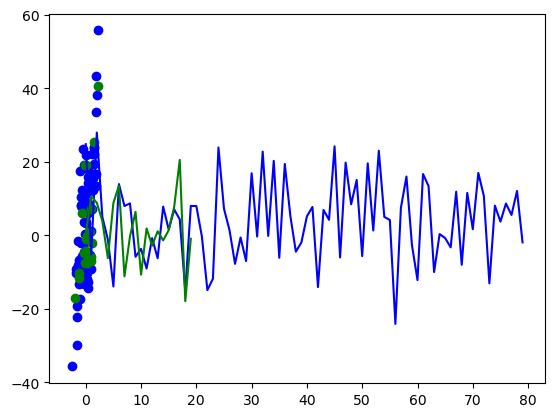

In [50]:
plot_artefacts([X_train, y_train], lrY_train.predict(X_train), [X_test, y_test], lrY_test.predict(X_test))

## Task 1b
Investigate how well polynomial regression with polynomial degrees = 2 can solve the task. In order to do so, follow these steps:
1. Transform the training and test data accordingly to describe polynomial distribution of degree=2
2. Train a Linear Regression model on polynomial data
3. Make predictions for training data
4. Make predictions for test data
5. Calculate MSE for training as well as test data

In [51]:
from sklearn.preprocessing import PolynomialFeatures

def poly_regression(train_data, test_data, degree):
    y_pred_train_poly = PolynomialFeatures(degree).fit(train_data)
    y_pred_test_poly = PolynomialFeatures(degree).fit(test_data)
    mse_test_poly = mean_squared_error(y_test, test_data)
    mse_train_poly = mean_squared_error(y_train, train_data)
    return y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly

In [52]:
y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(X_train, X_test, 2)
print(f"MSE of training data: {mse_train_poly}")
print(f"MSE of test data: {mse_test_poly}")

MSE of training data: 246.47754486383138
MSE of test data: 180.45366578556187


6. Did it perform better than Linear Regression? Visualize the results similar to **Task 1a) 4**.

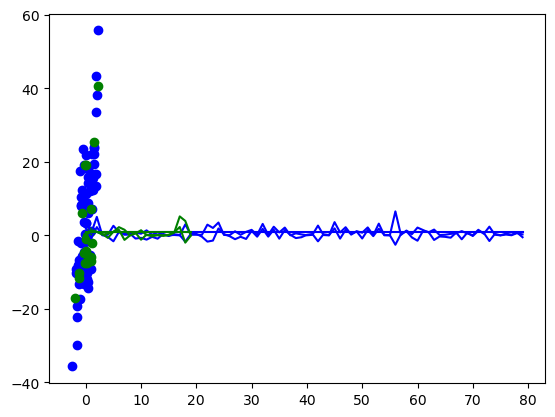

In [53]:
plot_artefacts([X_train, y_train], y_pred_train_poly.transform(X_train), [X_test, y_test], y_pred_test_poly.transform(X_test))

## Task 1c
Investigate the influence of polynomial degrees on the results. Consider degrees in `range(0, 11)`. Visualize the results similar to **Task 1a) 4** and plot MSE (on training as well as test data) as a function of the number of the polynomial degrees. 

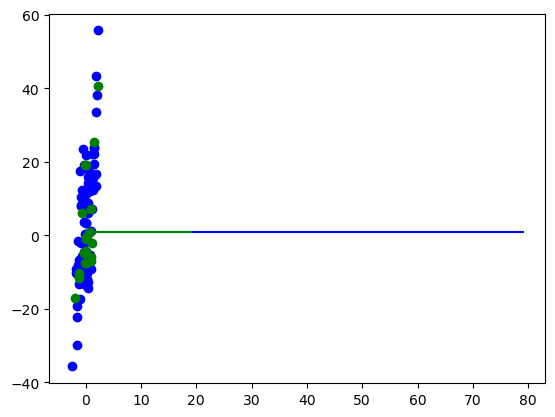

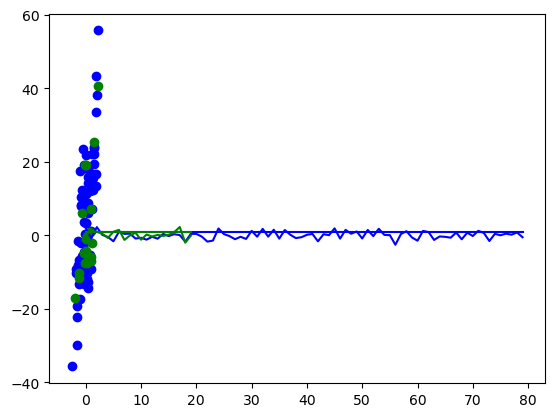

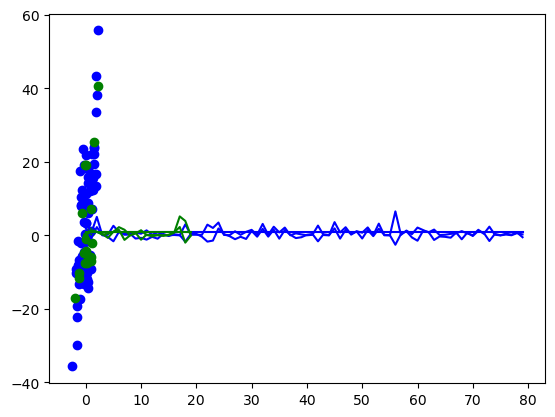

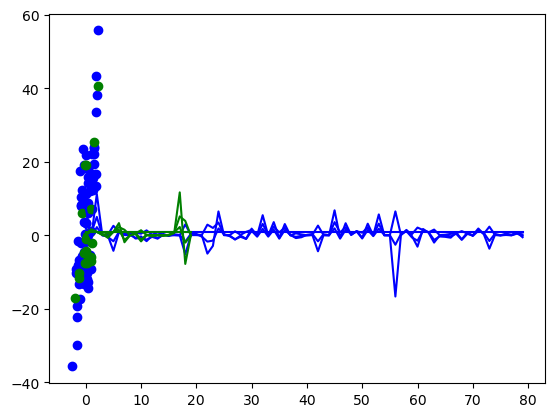

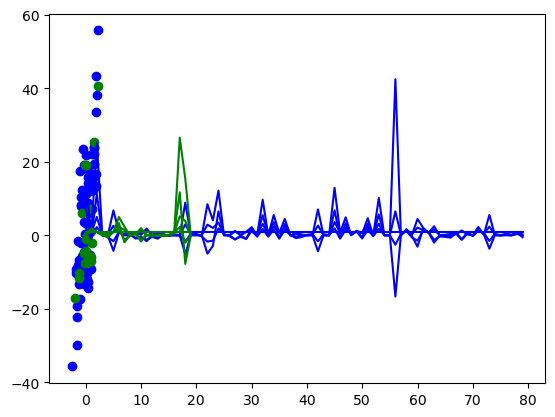

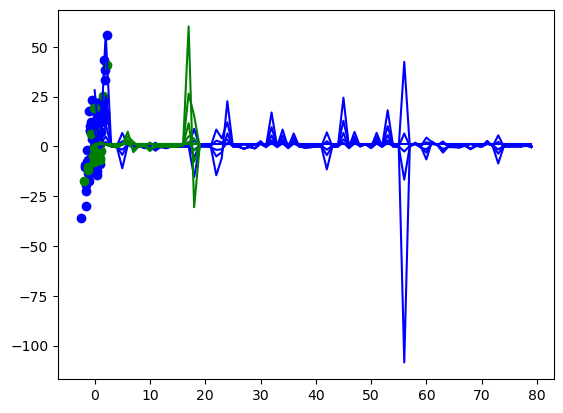

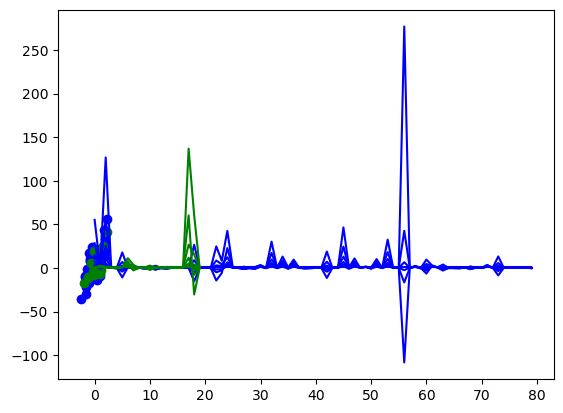

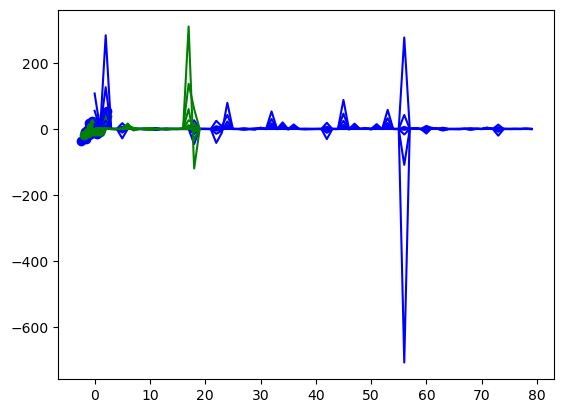

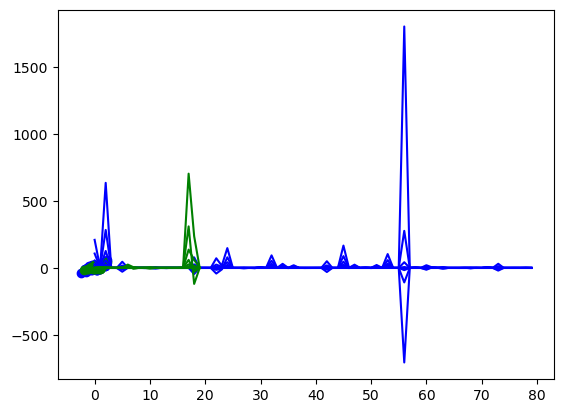

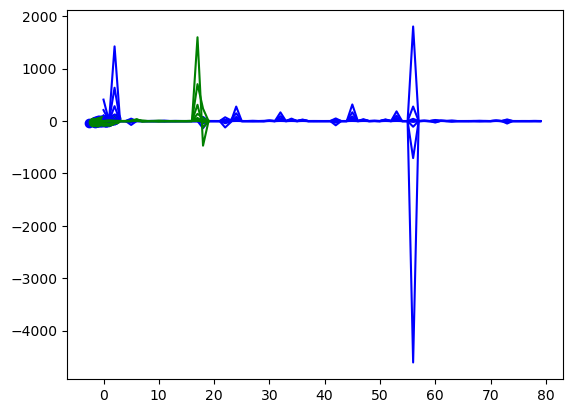

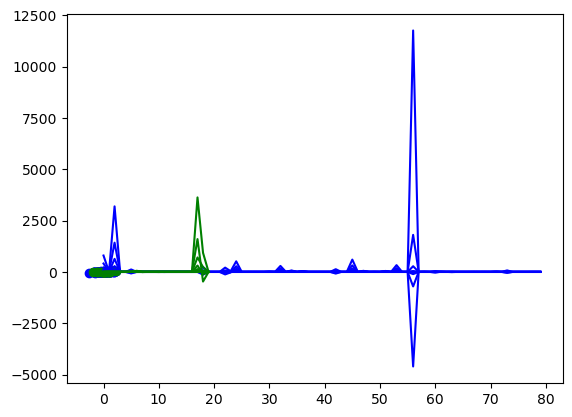

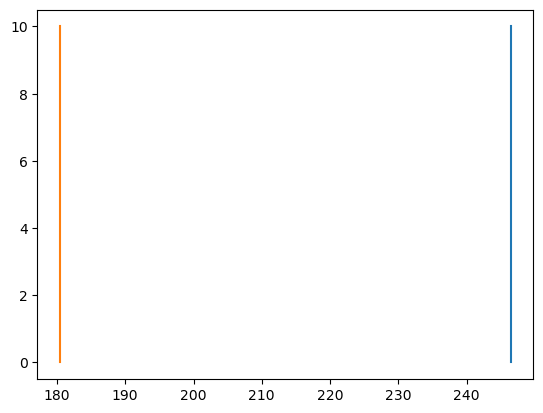

In [55]:
mses_test_poly = []
mses_train_poly = []

for i in range(0, 11):
    y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(X_train, X_test, i)
    mses_test_poly.append(mse_test_poly)
    mses_train_poly.append(mse_train_poly)
    plot_artefacts([X_train, y_train], y_pred_train_poly.transform(X_train), [X_test, y_test], y_pred_test_poly.transform(X_test))

plt.plot(mses_train_poly, range(0, 11))
plt.plot(mses_test_poly, range(0, 11))

## 📢 **HAND-IN** 📢: Answer following questions in Moodle:

What is the optimal value of the polynomial degrees? Do the values of MSE training and MSE test behave similarly? How do the models behave with polynomial degrees >= 8? 

# Task 2: Polynomial Data Transformation (1 Point)

As we have seen in the lecture, Polynomial Regression is nothing other than a generalization of Linear Regression. Every polynomial Regression can be expressed as a Multivariate Linear Regression. Only transformation of the initial data has to be done.

 $h_\theta(a) = \theta_0 + \theta_1a_1 +\theta_2a_2 $, where
 $ a_0 = v^0, a_1 = v^1, a_2 = v^2 $

In Task 1 `sklearn.preprocessing.PolynomialFeatures` transformed the X data for us. But in order to understand what exactly it is done to the data, in this task we transform an initial data array $v$ to 
the form $(a_1...a_n)$ that can be used to build a Polynomial Regression model with polynomial degrees=2 by hand (without using `sklearn.preprocessing.PolynomialFeatures`). Please transform the array $v$ and insert your answer in Moodle.

\begin{align}
v=
\begin{bmatrix}
3 \\
2 \\
0 \\
\end{bmatrix}
\end{align}

## 📢 **HAND-IN** 📢: Write your answer in Moodle

# Task 3: Logistic Regression (4 Points)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
sns.set()

## Task 3a. Data Exploration and Preprocessing

We are using the Fashion MNIST Dataset from Zalando. 
Firstly, we load and explore the dataset.



In [ ]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In following task we will only use training part of the dataset.

#### Prepare data 
1. assign following datatypes to the arrays:
   - X_train -> 'float32'
   - y_train -> 'int64'
2. reshape X_train to 2-dimensional array. 
Note: 
   - it should have the same amount of samples/rows.
3. split the training data into (X_train, y_train) and (X_valid, y_valid), set the size of the validation dataset to 20% of the training data and set random state = 42.

In [ ]:
...

#### Visualize some data 
Plot 25 images (hint: use ``imshow`` and ``subplots`` from matplotlib library), plot the label as title (e.g. shorts).

In [ ]:
plt.figure(figsize=(10,10))
...

#### Normalize the Images
With mean and standard deviation

In [ ]:
...

## Task 3b. Logistic Regression
1. Fit the `LogisticRegression` from `scikit-learn`. Set the `random_state` for reproducibility.
2. Try different parameters (either by hand or by using `GridSearchCV`)


**Accuracy should be >= 0.84**

Please, check the documentation on:
GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

PredefinedSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html

You can ignore a warning "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT." as long as GridSearchCV continues with the next hyperparameter and you reach the necessary accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
# We use predefined split in order to control that no train samples would be used in validation step


train_indices = np.full((X_train.shape[0],), -1, dtype=int)
test_indices = np.full((X_valid.shape[0],), 0, dtype=int)

ps = PredefinedSplit(np.append(train_indices, test_indices))

...

clf = LogisticRegression(...)
opt = GridSearchCV(clf, cv=ps, ...)

# when we fit the model, we should use both training and validation samples

...

Use the best found parameters for the next steps. `GridSearchCV` provides them in the `best_params_` attribute.

3. Create a new `LogisticRegression` instance with the best found parameters.
4. Fit it on the training set.
5. Calculate the accuracy on the validation set.

In [ ]:
from sklearn.metrics import accuracy_score

...

## 📢 **HAND-IN** 📢: Report in Moodle the accuracy you got in this task.